In [3]:
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt


In [4]:
img=cv.imread('watershed.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)


[ WARN:0@26.016] global loadsave.cpp:248 findDecoder imread_('watershed.png'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [5]:
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(thresh)


NameError: name 'gray' is not defined

In [ ]:
thresh1=255-thresh

In [ ]:
cv.imshow("Image",thresh1)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
kernel = np.ones((2, 2), np.uint8)

opening_result = cv.morphologyEx(thresh1, cv.MORPH_OPEN, kernel)
cv.imshow('Original Image',thresh1)
cv.imshow('Noise-Reduced Image', opening_result)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
sure_bg = cv.dilate(opening_result, kernel, iterations=4)
dist_transform = cv.distanceTransform(opening_result, cv.DIST_L2, 5)
threshold_value= 0.1*dist_transform.max()
ret, sure_fg = cv.threshold(dist_transform,threshold_value, 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)
cv.imshow('Original Image',opening_result)
cv.imshow('Sure Backgound', sure_bg)
cv.imshow('Sure Foreground', sure_fg)
cv.imshow("Unknown",unknown)
cv.waitKey(0)
cv.destroyAllWindows()

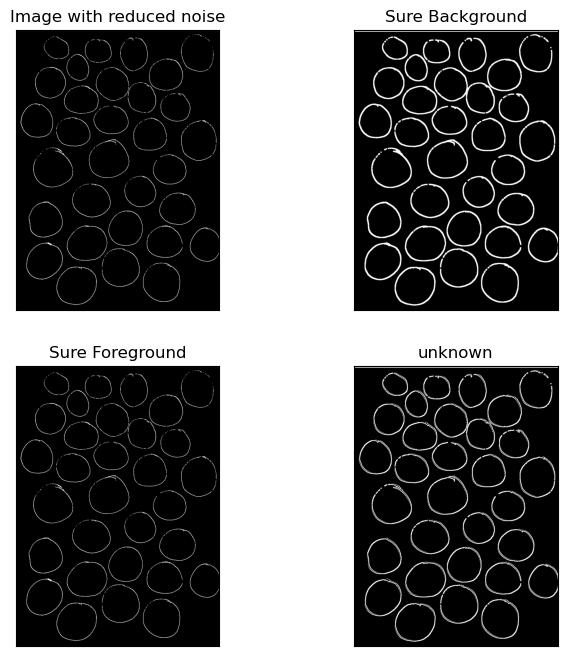

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].imshow(cv.cvtColor(opening_result, cv.COLOR_BGR2RGB))
axes[0, 0].set_title("Image with reduced noise")

axes[0, 1].imshow(cv.cvtColor(sure_bg, cv.COLOR_BGR2RGB))
axes[0, 1].set_title("Sure Background")

axes[1, 0].imshow(cv.cvtColor(sure_fg, cv.COLOR_BGR2RGB))
axes[1, 0].set_title("Sure Foreground")

axes[1, 1].imshow(cv.cvtColor(unknown, cv.COLOR_BGR2RGB))
axes[1, 1].set_title("unknown")


for ax in axes.flat:
    ax.set(xticks=[], yticks=[])

plt.show()

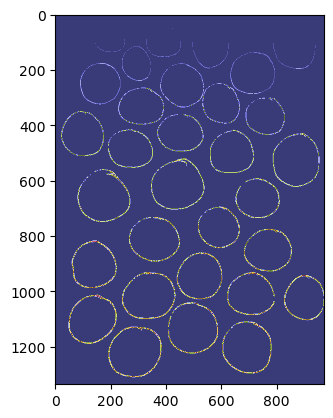

In [ ]:
ret, markers = cv.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
plt.imshow(markers, cmap="tab20b")

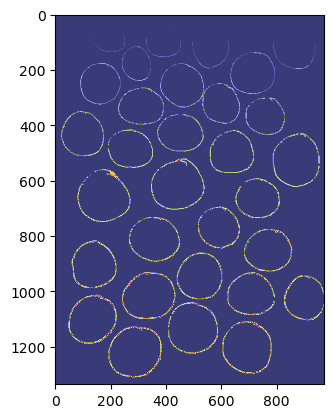

In [ ]:
markers1=cv.watershed(img, markers)
plt.imshow(markers1, cmap="tab20b")


In [ ]:
labels = np.unique(markers1) 
coins = [] 
for label in labels[2:]:   
    target = np.where(markers1 == label, 255, 0).astype(np.uint8)
    contours, hierarchy = cv.findContours( 
        target, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE 
    ) 
    coins.append(contours[0]) 
img2 = cv.drawContours(img, coins, -1, color=(0, 0, 255), thickness=3) 
cv.imshow("Segemented Image",img2)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
print("Number of segments ",labels[-1]-1)

Number of segments  567


In [ ]:
gray_img=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(gray_img, connectivity=8)
num_connected_objects = num_labels - 1
print("Number of connected objects:", num_connected_objects)

Number of connected objects: 1


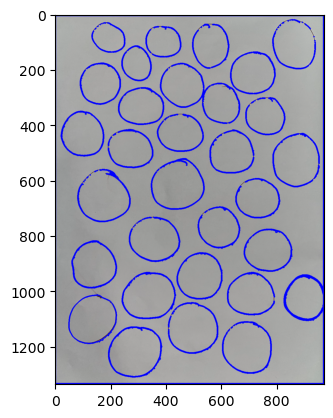

In [ ]:
plt.imshow(img2)